In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Normalization -> Lots of .csvs(Tables in SQL)

base_path = '../data/instacart-market-basket-analysis/'
aisles = pd.read_csv(base_path + 'aisles.csv')
departments = pd.read_csv(base_path + 'departments.csv')
prior = pd.read_csv(base_path + 'order_products__prior.csv')
train = pd.read_csv(base_path + 'order_products__train.csv')
orders = pd.read_csv(base_path + 'orders.csv')
products = pd.read_csv(base_path + 'products.csv')

In [10]:
datas = [aisles, departments, prior, train, orders, products]

for data in datas:
    print(data.shape)

(134, 2)
(21, 2)
(32434489, 4)
(1384617, 4)
(3421083, 7)
(49688, 4)


In [12]:
aisles # s는 묵음이야~

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [13]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [14]:
prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [15]:
train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [17]:
orders # day of week

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [18]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


# TODO: Cluster(Fragment) Customers

In [24]:
prior_sample = prior[:10000]
prior_sample

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
9995,1022,21903,1,1
9996,1022,38689,2,1
9997,1022,30391,3,1
9998,1022,18670,4,1


In [49]:
tmp = pd.merge(orders, prior_sample, on='order_id', how='inner')
tmp = pd.merge(tmp, products, on='product_id', how='inner')
tmp = pd.merge(tmp, aisles, on='aisle_id', how='inner')
tmp = pd.merge(tmp, departments, on='department_id', how='inner')

tmp

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,40,382,prior,29,1,15,23.0,10070,1,1,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
1,235,58701,prior,20,5,9,9.0,10070,7,1,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
2,581,76141,prior,3,6,17,7.0,10070,3,0,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
3,649,135836,prior,1,4,7,NaN,10070,1,0,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
4,40,382,prior,29,1,15,23.0,34866,4,1,Chocolate Milk 1% Milkfat,84,16,milk,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,152,103040,prior,12,1,10,7.0,5161,3,1,Dried Mango,18,10,bulk dried fruits vegetables,bulk
9996,959,119941,prior,2,6,13,21.0,5161,3,1,Dried Mango,18,10,bulk dried fruits vegetables,bulk
9997,400,180454,prior,32,0,8,8.0,5161,3,1,Dried Mango,18,10,bulk dried fruits vegetables,bulk
9998,18,118860,prior,3,4,20,6.0,1000,3,0,Apricots,18,10,bulk dried fruits vegetables,bulk


## EDA

In [57]:
tmp.user_id.value_counts()
tmp.product_name.value_counts()
tmp.aisle.value_counts()
tmp.department.value_counts()
tmp.order_dow.value_counts()
tmp.order_hour_of_day.value_counts()

12    903
13    821
9     818
16    815
10    813
11    793
15    775
17    771
14    706
8     601
18    546
20    373
19    335
7     231
22    175
21    172
23    134
6      95
0      76
1      26
4      16
2       5
Name: order_hour_of_day, dtype: int64

## Data pre-processing

1. Convert to Transaction Unit(User Level)
    * crosstab()
    * CountVectorizer

In [58]:
X = pd.crosstab(tmp.user_id, tmp.department)
X

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,1,0,2,1,0,0,...,0,0,1,0,0,1,0,0,2,0
971,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1059,0,0,3,0,3,0,0,8,0,0,...,0,1,2,0,0,2,0,0,8,2
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,1
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


## Clustering

1. Demension Reduction for Visualization: tSNE

In [68]:
from sklearn.manifold import TSNE

In [69]:
tsne = TSNE() # (n_components=2)

tsne_data = tsne.fit_transform(X)
tsne_data

/opt/homebrew/Caskroom/miniforge/base/envs/mains/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/mains/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[  7.652238  , -25.28216   ],
       [ 23.382252  ,   1.786402  ],
       [ 17.85443   , -16.962881  ],
       ...,
       [  6.7194066 , -13.520147  ],
       [ 12.176687  , -32.245968  ],
       [  0.52567464,  17.785233  ]], dtype=float32)

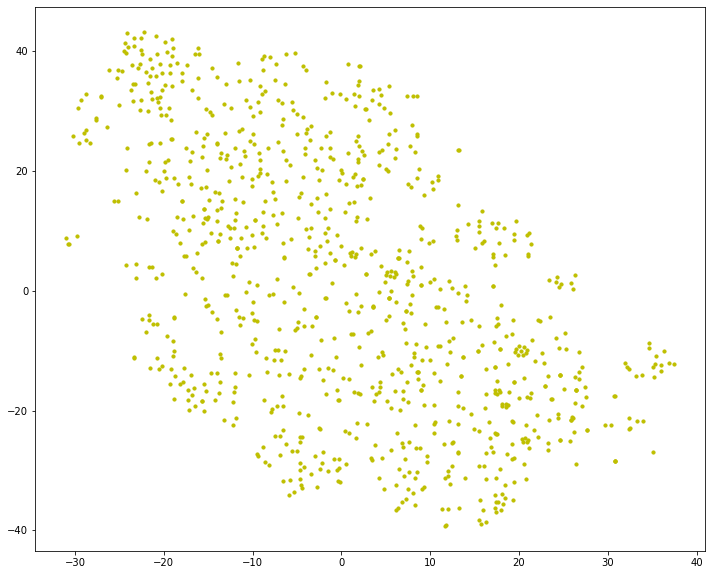

In [76]:
plt.rcParams['figure.figsize'] = (12, 10)

plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=10, c='y')
plt.show()

In [77]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

In [80]:
kmeans = KMeans(n_clusters=4)
kmeans_pred = kmeans.fit_predict(X)
kmeans_pred

array([1, 1, 1, 2, 1, 3, 2, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1,
       1, 1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 2, 2, 0, 1, 2, 1, 2, 3, 1, 3, 3,
       1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       3, 1, 3, 1, 2, 1, 1, 1, 2, 3, 1, 0, 1, 3, 0, 1, 1, 3, 1, 3, 3, 2,
       1, 1, 1, 3, 0, 3, 1, 1, 1, 1, 3, 1, 3, 1, 2, 1, 3, 1, 1, 1, 1, 3,
       1, 1, 1, 3, 1, 3, 1, 0, 1, 3, 1, 0, 3, 2, 1, 1, 3, 1, 3, 1, 3, 1,
       1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 2, 1, 2, 3, 3, 3, 2, 1, 0,
       1, 0, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 0, 3, 3, 1, 3, 2, 3, 2, 1,
       1, 3, 2, 1, 3, 1, 3, 1, 1, 0, 1, 0, 3, 1, 1, 1, 3, 1, 1, 3, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1, 1,
       2, 3, 3, 3, 2, 3, 3, 3, 3, 1, 1, 0, 3, 1, 3, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 3, 3, 1, 1, 3, 1, 3, 1, 0, 2, 2, 1, 3, 1, 1, 1, 1, 1, 3, 2,
       1, 3, 2, 3, 1, 1, 1, 2, 1, 3, 3, 1, 1, 3, 1, 3, 1, 2, 1, 1, 3, 1,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 3, 2, 1, 1, 1,

In [81]:
from sklearn.metrics import silhouette_score

In [84]:
print('Silhouette Score: %.4f' % silhouette_score(X, kmeans_pred)) # X: Origin data(No True data)

Silhouette Score: 0.1910


### Elbow method

In [86]:
sses = list()
silhouettes = list()

for K in range(2, 11):
    kmeans = KMeans(n_clusters=K)
    kmeans_pred = kmeans.fit_predict(X)
    sses.append(kmeans.inertia_) # Value of SSE
    silhouettes.append(silhouette_score(X, kmeans_pred))

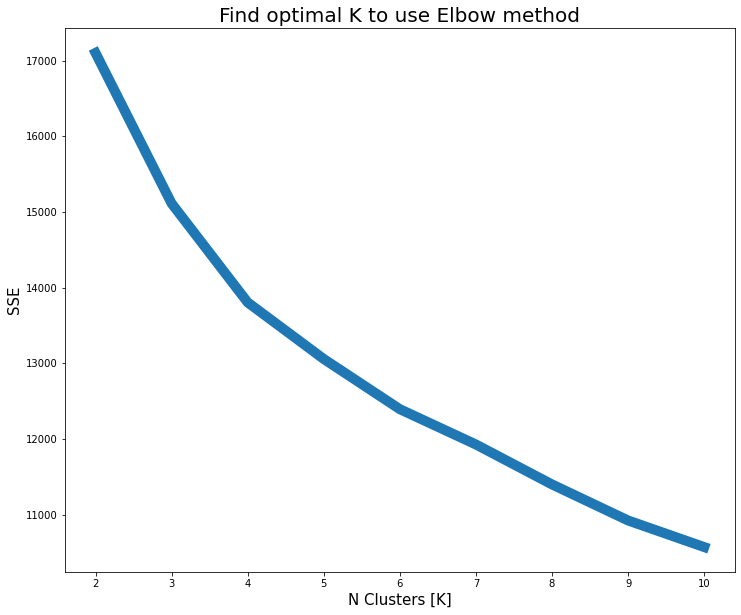

In [91]:
plt.title('Find optimal K to use Elbow method', fontsize=20)
plt.xlabel('N Clusters [K]', fontsize=15)
plt.ylabel('SSE', fontsize=15)
plt.plot(range(2, 11), sses, lw=10)
plt.show()

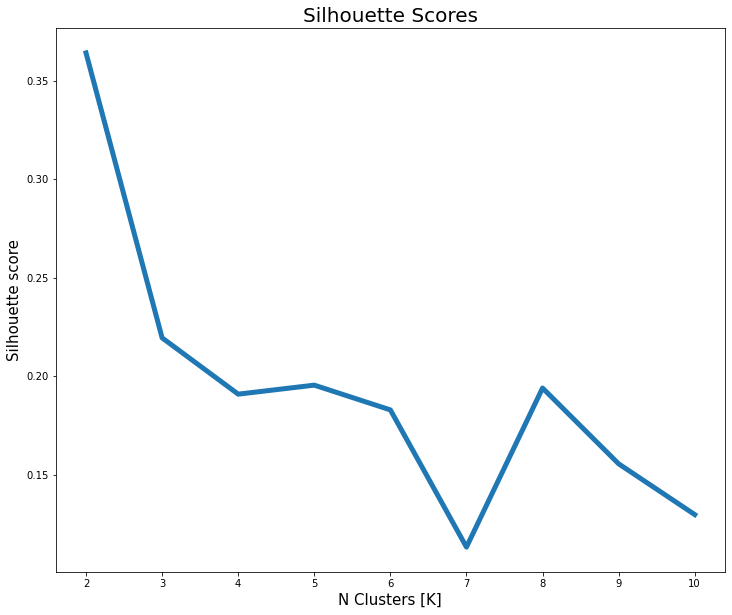

In [95]:
plt.title('Silhouette Scores', fontsize=20)
plt.xlabel('N Clusters [K]', fontsize=15)
plt.ylabel('Silhouette score', fontsize=15)
plt.plot(range(2, 11), silhouettes, lw=5) # Line width
plt.show()

## Prediction

In [103]:
elbow_best = KMeans(n_clusters=4)
silhou_best = KMeans(n_clusters=2)

eb_pred = elbow_best.fit_predict(X)
sb_pred = silhou_best.fit_predict(X)

print('[Best of Elbow method] Silhouette Score: %.4f' % silhouette_score(X, eb_pred))
print('[Best of Silhouette Score] Silhouette Score: %.4f' % silhouette_score(X, sb_pred))

[Best of Elbow method] Silhouette Score: 0.1915
[Best of Silhouette Score] Silhouette Score: 0.3641


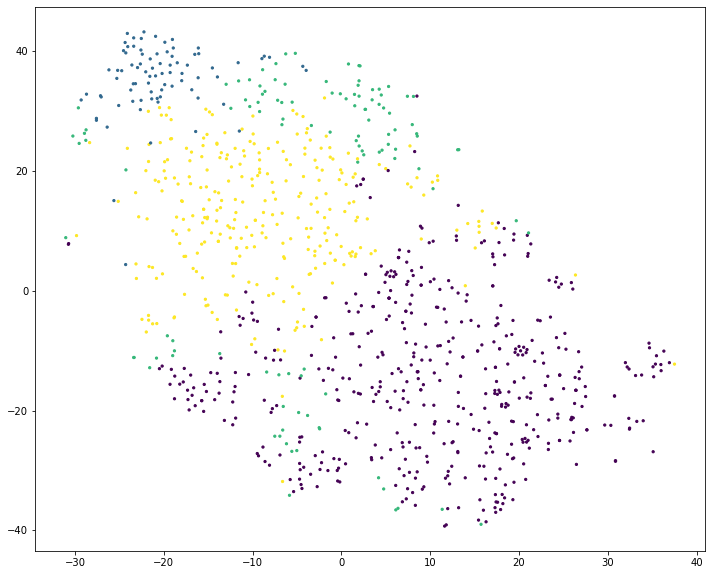

In [108]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=5, c=eb_pred, cmap='viridis')

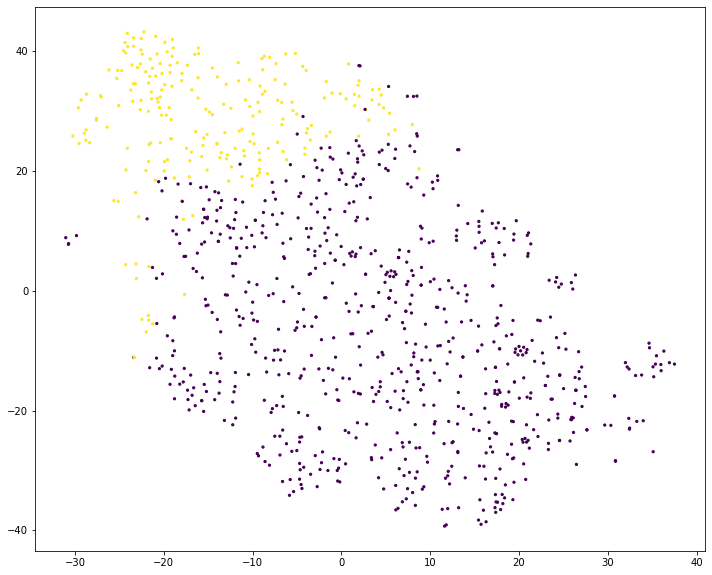

In [109]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=5, c=sb_pred, cmap='viridis')

## Test

In [110]:
X['cluster_label'] = sb_pred
X

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,cluster_label
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,1,0,2,1,0,0,...,0,1,0,0,1,0,0,2,0,0
971,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1059,0,0,3,0,3,0,0,8,0,0,...,1,2,0,0,2,0,0,8,2,1
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,4,1,0
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,1,0,0


In [111]:
cluster0 = X[X.cluster_label == 0]
cluster1 = X[X.cluster_label == 1]

print(cluster0.shape, cluster1.shape)

(750, 22) (222, 22)


In [116]:
cluster0.mean().sort_values(ascending=False) # Top 3: produce, dairy eggs, beverages

department
produce            1.668000
dairy eggs         1.273333
beverages          0.776000
snacks             0.728000
frozen             0.653333
pantry             0.512000
bakery             0.297333
canned goods       0.282667
household          0.252000
deli               0.241333
dry goods pasta    0.202667
breakfast          0.201333
meat seafood       0.166667
personal care      0.129333
babies             0.105333
international      0.073333
alcohol            0.033333
pets               0.026667
other              0.016000
missing            0.014667
bulk               0.002667
cluster_label      0.000000
dtype: float64

In [117]:
cluster1.mean().sort_values(ascending=False) # Top 3: produce, dairy eggs, snacks

department
produce            7.486486
dairy eggs         3.117117
snacks             1.423423
frozen             1.153153
cluster_label      1.000000
beverages          0.986486
pantry             0.963964
canned goods       0.675676
deli               0.621622
bakery             0.590090
dry goods pasta    0.463964
meat seafood       0.450450
breakfast          0.391892
household          0.270270
babies             0.234234
international      0.139640
personal care      0.126126
pets               0.036036
missing            0.018018
bulk               0.018018
alcohol            0.009009
other              0.004505
dtype: float64

### 4 Clusters

In [118]:
X['4_cluster_label'] = eb_pred
X

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,cluster_label,4_cluster_label
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,1,0,2,1,0,0,...,1,0,0,1,0,0,2,0,0,0
971,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1059,0,0,3,0,3,0,0,8,0,0,...,2,0,0,2,0,0,8,2,1,2
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,4,1,0,3
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,1,0,0,0


In [124]:
cluster0 = X[X['4_cluster_label'] == 0]
cluster1 = X[X['4_cluster_label'] == 1]
cluster2 = X[X['4_cluster_label'] == 2]
cluster3 = X[X['4_cluster_label'] == 3]

print(cluster0.shape, cluster1.shape, cluster2.shape, cluster3.shape)
print('---------------------------------------')

print(cluster0.mean().sort_values(ascending=False))
print('---------------------------------------')
print(cluster1.mean().sort_values(ascending=False))
print('---------------------------------------')
print(cluster2.mean().sort_values(ascending=False))
print('---------------------------------------')
print(cluster3.mean().sort_values(ascending=False))

(494, 23) (81, 23) (112, 23) (285, 23)
---------------------------------------
department
dairy eggs         1.006073
produce            0.831984
beverages          0.771255
snacks             0.629555
frozen             0.574899
pantry             0.433198
household          0.259109
bakery             0.232794
canned goods       0.224696
deli               0.202429
breakfast          0.176113
dry goods pasta    0.176113
meat seafood       0.131579
personal care      0.119433
babies             0.085020
international      0.056680
alcohol            0.040486
pets               0.022267
other              0.018219
missing            0.006073
bulk               0.002024
cluster_label      0.000000
4_cluster_label    0.000000
dtype: float64
---------------------------------------
department
produce            10.654321
dairy eggs          2.987654
beverages           1.358025
frozen              1.296296
snacks              1.283951
4_cluster_label     1.000000
cluster_label       1.0000